In [172]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
# Ignore all warnings
warnings.filterwarnings("ignore")


In [173]:
social_data_df = pd.read_excel('./social_data.xlsx')

In [175]:
social_data_df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [176]:
social_data_df.describe()

,Total Impressions,Total Engagements
count,3479.000000,3479.000000
mean,10972.453579,947.390629
std,29577.108063,3468.628038
min,0.000000,0.000000
25%,167.000000,0.000000
50%,1884.000000,39.000000
75%,12467.000000,276.500000
max,753227.000000,95062.000000


In [177]:
social_data_df.shape # 3479 rows and 7 columns/features in the data

(3479, 7)

In [178]:
social_data_df['Campaign Name'].value_counts()/len(social_data_df['Campaign Name'])*100

N/A                      42.684680
Community Engagement     40.557632
Evil Exhibited           12.072435
Evergreen                 4.685254
Name: Campaign Name, dtype: float64

43% of Campaign Name has N/A which means the canditates doesn't belongs to any Campaign.

In [179]:
(social_data_df['Total Impressions']==0).value_counts()/len(social_data_df['Total Impressions'])*100

False    78.614544
True     21.385456
Name: Total Impressions, dtype: float64

About 21% of the records have zero impression . This advertisement or content was not displayed to the users.



In [180]:
(social_data_df['Total Engagements']==0).value_counts()/len(social_data_df['Total Engagements'])*100

False    72.2334
True     27.7666
Name: Total Engagements, dtype: float64

27% of the records have zero engagement. This means there is no interaction, involvement or response from the users.

In [181]:
filtered_df = social_data_df[(social_data_df['Total Impressions'] != 0) & (social_data_df['Total Engagements'] != 0)]


In [184]:
selected_columns = filtered_df[['Total Impressions', 'Total Engagements']]
selected_columns

,Total Impressions,Total Engagements
4,9517,1215
6,1882,83
7,17892,3076
9,13874,1447
10,37692,8044
...,...,...
3463,393,18
3464,136660,2371
3465,29051,811
3470,7704,153


In [186]:
filtered_df['Engagement Rate']= (filtered_df['Total Engagements']/filtered_df['Total Impressions'])*100
filtered_df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399


1. What is the typical engagement rate we can expect? What’s the likelihood that we can
achieve a 15% engagement rate?

In [187]:
average_Engagement_Rate = filtered_df['Engagement Rate'].mean()
print(f"The average engagement rate we can expect is: {average_Engagement_Rate:.2f}%")

The average engagement rate we can expect is: 44.07%


In [188]:
likelihood = len(filtered_df[filtered_df['Engagement Rate'] >= 15]) / len(filtered_df) * 100
print(f"The likelihood of achieving a 15% or higher engagement rate is: {likelihood:.2f}%")

The likelihood of achieving a 15% or higher engagement rate is: 8.99%


**2. Does day of the week and time of posting affect engagement rates?**

In [189]:
# Extract the day of the week from the 'Day' column
filtered_df['Weekday'] = filtered_df['Published Date'].dt.day_name()


In [190]:
# Extract the hour from the 'Time' column
filtered_df['Hour'] = pd.to_datetime(filtered_df['Published Date']).dt.hour

In [191]:
# Calculate the mean engagement rate by weekday
mean_engagement_by_weekday = filtered_df.groupby('Weekday')['Engagement Rate'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reindex the DataFrame to match the desired weekday order
mean_engagement_by_weekday = mean_engagement_by_weekday.reindex(weekday_order)

# Calculate the mean engagement rate by hour
mean_engagement_by_hour = filtered_df.groupby('Hour')['Engagement Rate'].mean()


Average Engagement Rate by Weekday:
Weekday
Monday         4.667923
Tuesday        6.986172
Wednesday      4.812665
Thursday      10.872485
Friday       180.234005
Saturday       4.274665
Sunday         6.515960
Name: Engagement Rate, dtype: float64


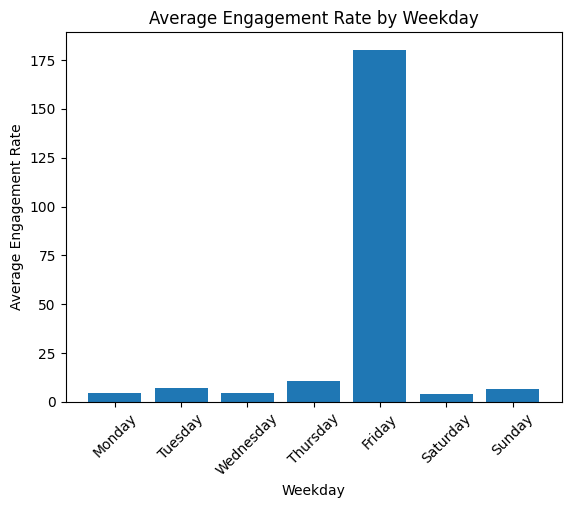

In [192]:
print("Average Engagement Rate by Weekday:")
print((mean_engagement_by_weekday))


# Plotting the bar graph
plt.bar(mean_engagement_by_weekday.index, mean_engagement_by_weekday)

# Adding labels and title
plt.xlabel('Weekday')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Weekday')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


1. From the data, it appears that Friday has the highest mean engagement rate with a value of 180.234005, followed by Thursday with 10.872485. Monday, Saturday, Sunday, Tuesday, and Wednesday have lower mean engagement rates ranging from 4.667923 to 6.986172.
2. Friday and Thursday tend to have higher engagement rates compared to the other weekdays, while Monday through Wednesday have relatively lower engagement rates. This can be due to the days are closer to weekend and user or customers are planing for weekends. Hence, the engagement is more on Thursday and Friday.

Average Engagement Rate by hour:
Hour
2       0.840156
3       5.656221
4       6.371824
5      11.948559
6      22.797938
7       7.003560
8       8.042996
9       6.624613
10      5.101907
11      9.782577
12    434.735592
13      5.452764
14      5.534145
15      5.016568
16      5.728010
17      5.842897
18      5.046269
19      5.020392
20      5.685639
21      6.089147
22      2.059433
23      2.859394
Name: Engagement Rate, dtype: float64


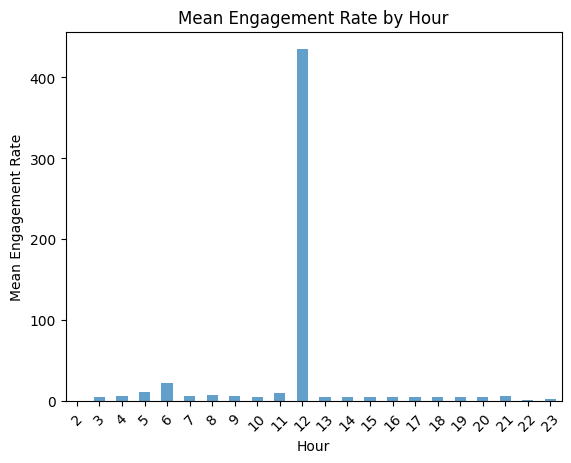

In [193]:

print("Average Engagement Rate by hour:")
print((mean_engagement_by_hour))

# Plotting the bar graph
mean_engagement_by_hour.plot(kind='bar', alpha=0.7)  # Set alpha value to adjust the transparency of the bars

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Mean Engagement Rate')
plt.title('Mean Engagement Rate by Hour')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

The engagement rates are highest around hour 12, with an average engagement rate of 434.74.This indicates that content posted around noon tends to attract a high level of engagement.

3. **How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?**

In [194]:
filtered_df.Account.value_counts()

General             1538
DOTA2                691
CSGO                 198
Content Creators      34
Valorant              31
General               21
Name: Account, dtype: int64

In [195]:
(filtered_df['Account'] == 'General').value_counts()

False    2492
True       21
Name: Account, dtype: int64

In [196]:
(filtered_df['Account'] == 'General ').value_counts()

True     1538
False     975
Name: Account, dtype: int64

In [198]:
#removed all the spaces in the account column to make the data homogenous
filtered_df['Account'] = filtered_df['Account'].str.replace(" ", "")  

In [199]:
filtered_df.Account.value_counts()

General            1559
DOTA2               691
CSGO                198
ContentCreators      34
Valorant             31
Name: Account, dtype: int64

Now the spaces are removed from General games.

In [200]:
game_average_social_performance = filtered_df.groupby('Account')['Total Impressions', 'Total Engagements','Engagement Rate'].mean()

In [201]:
sorted_social_performance = game_average_social_performance.sort_values(by='Total Impressions', ascending=False)


In [202]:
#performance of game titles
sorted_social_performance  

,Total Impressions,Total Engagements,Engagement Rate
Account,,,
General,21076.433611,1973.911482,68.043645
CSGO,11686.454545,466.343434,4.132564
DOTA2,2689.794501,179.435601,4.994979
ContentCreators,1328.764706,40.794118,6.353192
Valorant,740.935484,30.032258,5.854570


1. Based on these metrics, it appears that the "General" game is performing well across all aspects, including engagement rate, total impressions, and total engagements. Therefore, it may be worth focusing more on the "General" game to leverage its high engagement and reach.


4. What media type performs the best?

In [203]:
average_Engagement_Rate_media_type=filtered_df.groupby('Media Type')['Total Impressions', 'Total Engagements','Engagement Rate'].mean()

In [204]:
sorted_social_performance = average_Engagement_Rate_media_type.sort_values(by='Engagement Rate', ascending=False)

In [205]:
sorted_social_performance

,Total Impressions,Total Engagements,Engagement Rate
Media Type,,,
Photo,20776.033154,1942.418459,92.729394
Album,20.000000,8.000000,40.000000
Mixed,36996.800000,2732.800000,10.770357
Video,12787.890000,1074.313750,5.927097
Text,5738.170055,455.290203,4.136746
Carousel,17854.333333,726.777778,3.784294
Link,5669.878049,55.048780,3.749983


The "**Mixed**" media type **performs well** in terms of total impressions, total engagements, and has a decent engagement rate. However, the "**Photo**" media type stands out with the **highest engagement rate.** Hence, user spend more time on advertisements which has Photo in it. Generally, pictorial representaion of anything grabs more attention in our day to day life that and applies here too.


5. **What is our best performing campaign?**

In [206]:
filtered_df.head(10)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Weekday,Hour
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,Friday,19
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202,Friday,19
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041,Friday,19
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581,Friday,18
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399,Friday,18
11,2023-03-31 18:30:33.067,DOTA2,TWITTER,N/A,1013,153,Link,15.103653,Friday,18
12,2023-03-31 18:28:16.346,DOTA2,TWITTER,N/A,4630,339,Photo,7.321814,Friday,18
13,2023-03-31 18:21:55.727,CSGO,TWITTER,Community Engagement,2289,41,Photo,1.791175,Friday,18
14,2023-03-31 17:11:28.436,General,TWITTER,Community Engagement,5216,113,Text,2.166411,Friday,17
15,2023-03-31 17:09:27.380,CSGO,TWITTER,Community Engagement,841,13,Photo,1.545779,Friday,17


In [207]:
average_Engagement_Rate_campaigns =filtered_df.groupby('Campaign Name')['Total Impressions', 'Total Engagements','Engagement Rate'].mean()

In [208]:
sorted_average_Engagement_Rate_campaigns = average_Engagement_Rate_campaigns.sort_values(by='Engagement Rate', ascending=False)

In [209]:
sorted_average_Engagement_Rate_campaigns

,Total Impressions,Total Engagements,Engagement Rate
Campaign Name,,,
N/A,9482.528610,1393.423706,137.745797
Community Engagement,18337.159684,1616.416601,6.284858
Evergreen,8252.975155,267.869565,3.510548
Evil Exhibited,15902.155807,524.943343,3.190826


1. The campaign with the highest engagement rate is marked as "N/A" with an engagement rate of 137.745797. This can be interpreted as the marketing done by influencer or users who have more followers and shared the advertisment through different social media plaforms. 
Currenlty, influencers is one of best way to increase the reach.

2. Among the named campaigns, the "Community Engagement" campaign has the highest engagement rate of 6.284858, followed by the "Evergreen" campaign with an engagement rate of 3.510548 and the "Evil Exhibited" campaign with an engagement rate of 3.190826.

6. Define out a posting strategy for our social channels based on your discoveries.

In [210]:
social_channels_with_media_type= filtered_df.groupby(['Account Type','Media Type'])['Total Impressions', 'Total Engagements','Engagement Rate'].mean()

In [211]:
sorted_social_channels_with_media_type = social_channels_with_media_type.sort_values(by='Total Impressions', ascending=False)

In [212]:
sorted_social_channels_with_media_type

Total Impressions  Total Engagements  \
Account Type     Media Type                                         
FBPAGE           Video            39510.313953        6530.081395   
                 Text             37621.843750        6342.781250   
TWITTER          Mixed            36996.800000        2732.800000   
FBPAGE           Photo            31618.336538        5809.833333   
INSTAGRAM        Photo            22586.500000        1385.785714   
                 Carousel         17854.333333         726.777778   
TWITTER          Photo            16596.615990         413.799476   
INSTAGRAM        Video            14357.478992         325.579832   
TWITTER          Video            13427.325444         680.047337   
FBPAGE           Link              6416.000000          52.000000   
TWITTER          Link              5899.918919          54.351351   
                 Text              3745.027668          85.571146   
TIKTOK_BUSINESS  Video             3072.848214         168.437500   
LINKEDIN_COMPANY Link              2584.000000          64.666667   
                 Photo             1960.923077          41.538462   
                 Text              1822.333333          14.666667   
YOUTUBE          Video             1666.965035          72.223776   
LINKEDIN_COMPANY Video             1457.000000          35.500000   
FBPAGE           Album               20.000000           8.000000   

                             Engagement Rate  
Account Type     Media Type                   
FBPAGE           Video             15.059735  
                 Text              16.324993  
TWITTER          Mixed             10.770357  
FBPAGE           Photo            323.227846  
INSTAGRAM        Photo              4.630355  
                 Carousel           3.784294  
TWITTER          Photo              3.255727  
INSTAGRAM        Video              1.918918  
TWITTER          Video              5.744623  
FBPAGE           Link               0.810474  
TWITTER          Link               3.946132  
                 Text               3.385627  
TIKTOK_BUSINESS  Video              5.364224  
LINKEDIN_COMPANY Link               2.310642  
                 Photo              1.934351  
                 Text               0.817541  
YOUTUBE          Video              4.690586  
LINKEDIN_COMPANY Video              2.479645  
FBPAGE           Album             40.000000

Based on the analysis of the social media performance data, here is a suggested posting strategy for your social channels:

1. Facebook Page (FBPAGE):
   - Focus on posting engaging videos, as they have the highest average total impressions and total engagements.
   - Consider sharing impactful photos, which also have a high average engagement rate.
   - Avoid posting links, as they have a relatively low engagement rate.

2. Twitter:
   - Emphasize a mix of media types, including mixed content, photos, and videos, as they all have reasonable average engagement rates.
   - Pay attention to the performance of links and adjust the posting frequency accordingly, as they have a relatively higher engagement rate compared to other platforms.

3. Instagram:
   - Prioritize posting high-quality photos, as they have a relatively high average total impressions and engagement rate.
   - Explore the potential of sharing engaging videos to increase the variety of content and potentially attract more audience engagement.

4. TikTok Business:
   - Capitalize on the popularity of videos on TikTok by sharing engaging and attention-grabbing video content.
   - Monitor the performance closely and adapt the posting frequency and content strategy based on the engagement rate.

5. LinkedIn Company:
   - Focus on sharing relevant and informative links, as they have a relatively higher engagement rate on this platform.
   - Experiment with video content to increase engagement and diversify the media types.

6. YouTube:
   - Invest in creating compelling video content to maximize total impressions and engagements on this platform.

Lastly, It's important to regularly analyze the performance metrics, monitor audience preferences, and adapt the posting strategy based on the feedback and insights gained from social media .

7. What suggestions would you give to the social media team if they want to expand their
presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

Based on the provided data, here are some suggestions for the social media team to expand their presence:

 1. Instagram shows decent performance in terms of photo content, with relatively high total impressions. The team can consider investing more in Instagram by creating visually appealing and engaging content, leveraging the platform's strong visual nature.

 2. The Facebook page is performing well in terms of total impressions and engagement rate, especially for photo content. To expand their presence on Facebook, the team can continue focusing on photo posts and explore other engaging formats like videos and links.

 3. Twitter shows a good engagement rate for mixed media content. The team can continue utilizing Twitter and experiment with different media types to keep the audience engaged. Additionally, they can explore using Twitter for timely and interactive content, such as live updates, polls, and engaging with the gaming community.

 4. Expanding to TikTok can be a strategic move. The team can repurpose or create new short-form video content specifically tailored to TikTok's format and audience preferences.

 5. The team can leverage the existing successful channels to cross-promote content on other platforms. For example, promoting YouTube videos on Instagram, Twitter, or TikTok can help drive traffic and increase visibility across different platforms.



